# <center>AMAZON'S BOOKS REVIEWS </center>

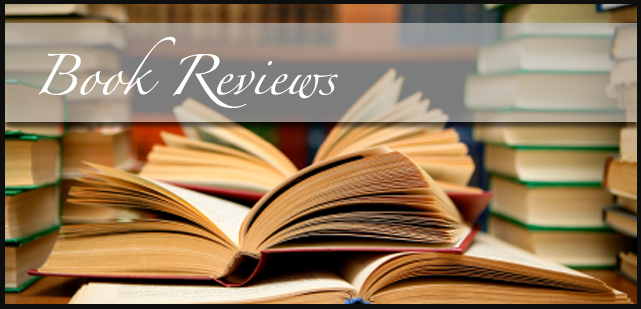

## 📚ABOUT DATASET
---

         * Dataset on Amazon's Top 50 bestselling books reviews from 2009 to 2019. 
         * Contains 550 books, data has been categorized into fiction and non-fiction using Goodreads.
         * Scrapped dataset on October 2020, categories (fiction/non-fiction) added

## ✔️IMPORTING PACKAGES
---

In [1]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

## 📂IMPORTING DATASET
---

In [3]:
df = pd.read_csv('amazon_bestselling_books.csv')
df.head(10)

Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   
5      A Dance with Dragons (A Song of Ice and Fire)   
6  A Game of Thrones / A Clash of Kings / A Storm...   
7                     A Gentleman in Moscow: A Novel   
8      A Higher Loyalty: Truth, Lies, and Leadership   
9                          A Man Called Ove: A Novel   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
5       George R. R. Martin          4.4    12643     11  2011      Fiction  
6       George R. R. Martin          4.7    19735     30  2014      Fiction  
7               Amor Towles          4.7    19699     15  2017      Fiction  
8               James Comey          4.7     5983      3  2018  Non Fiction  
9           Fredrik Backman          4.6    23848      8  2016      Fiction

## 📚EXPLORATORY DATA ANALYSIS
---

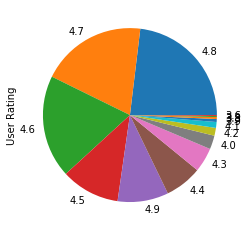

In [4]:
y = df["User Rating"].value_counts()
y.plot(kind="pie")

In [5]:
fig = px.histogram(df, x="User Rating",labels={'':'The Number of Books'},title="User Rating Histogram")
fig.show()

In [6]:
authors = df["Author"].value_counts()
author_times = []
author_names = []
for i in range(len(authors)):
    author_names.append(authors.keys()[i])
    author_times.append(authors[i])

In [7]:
popular_authors = pd.DataFrame({"Author":author_names,"Number of Times":author_times})
popular_authors

Author  Number of Times
0                           Jeff Kinney               12
1                          Rick Riordan               11
2                       Suzanne Collins               11
3                          Gary Chapman               11
4    American Psychological Association               10
..                                  ...              ...
243                          Chip Heath                1
244                        Brené Brown                1
245                       M Prefontaine                1
246                         Julia Child                1
247                      John Heilemann                1

[248 rows x 2 columns]

In [8]:
df[['User Rating','Author','Name']].groupby(by=['Author','Name']).mean().sort_values(by=['User Rating'],ascending=False).head(10)

User Rating
Author                Name                                                           
J. K. Rowling         Harry Potter and the Goblet of Fire: The Illust...          4.9
Dav Pilkey            Dog Man: A Tale of Two Kitties: From the Creato...          4.9
J.K. Rowling          Harry Potter and the Sorcerer's Stone: The Illu...          4.9
Brandon Stanton       Humans of New York : Stories                                4.9
J.K. Rowling          Harry Potter and the Prisoner of Azkaban: The I...          4.9
Bill Martin Jr.       Brown Bear, Brown Bear, What Do You See?                    4.9
Emily Winfield Martin The Wonderful Things You Will Be                            4.9
J.K. Rowling          Harry Potter and the Chamber of Secrets: The Il...          4.9
Rush Limbaugh         Rush Revere and the Brave Pilgrims: Time-Travel...          4.9
Jeff Kinney           Wrecking Ball (Diary of a Wimpy Kid Book 14)                4.9

In [9]:
df[['Name','User Rating','Year']].groupby(by='Name').mean().sort_values(by='User Rating',ascending=False).head(5)

User Rating    Year
Name                                                                   
Hamilton: The Revolution                                    4.9  2016.0
Rush Revere and the First Patriots: Time-Travel...          4.9  2014.0
Harry Potter and the Sorcerer's Stone: The Illu...          4.9  2016.0
Harry Potter and the Prisoner of Azkaban: The I...          4.9  2017.0
Harry Potter and the Goblet of Fire: The Illust...          4.9  2019.0

In [10]:
df['Name_len']=df['Name'].str.len()

In [11]:
px.scatter(df.sort_values(by='Year'),x='User Rating',y='Price', animation_frame='Year', color='Genre',size='Name_len', title="Over all book Rating & Price by every year")

In [12]:
year = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
num_fic= []
for i in year:
    fic = df[(df["Year"] == i) & (df["Genre"] == "Fiction")]
    num_fic.append(len(fic))
df_fict = pd.DataFrame({"Year": year,"numberofFiction": num_fic})
df_fict.head()

Year  numberofFiction
0  2009               24
1  2010               20
2  2011               21
3  2012               21
4  2013               24

In [13]:
year = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
num_nonfic= []
for i in year:
    nonfic = df[(df["Year"] == i) & (df["Genre"] == "Non Fiction")]
    num_nonfic.append(len(nonfic))
df_nonfict = pd.DataFrame({"Year": year,"numberofNonFiction": num_nonfic})
df_nonfict.head()

Year  numberofNonFiction
0  2009                  26
1  2010                  30
2  2011                  29
3  2012                  29
4  2013                  26

In [14]:
df_nonfict["numberofFiction"] = df_fict["numberofFiction"]
df_nonfict.head()

Year  numberofNonFiction  numberofFiction
0  2009                  26               24
1  2010                  30               20
2  2011                  29               21
3  2012                  29               21
4  2013                  26               24

In [15]:
df_genre = df_nonfict.copy()
df_genre.head()

Year  numberofNonFiction  numberofFiction
0  2009                  26               24
1  2010                  30               20
2  2011                  29               21
3  2012                  29               21
4  2013                  26               24

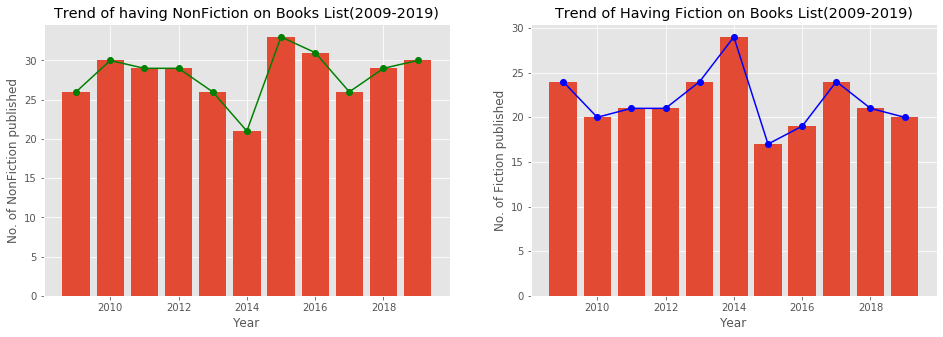

In [16]:
plt.style.use("ggplot")
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.bar(x = df_genre["Year"],height=df_genre["numberofNonFiction"],)
plt.plot(df_genre["Year"],df_genre["numberofNonFiction"],"go-")
#plt.plot(df_genre["Year"],df_genre["numberofFiction"],"bo-")
plt.title("Trend of having NonFiction on Books List(2009-2019)")
plt.xlabel("Year")
plt.ylabel("No. of NonFiction published")

plt.subplot(1,2,2)
plt.bar(x = df_genre["Year"],height=df_genre["numberofFiction"],)
plt.plot(df_genre["Year"],df_genre["numberofFiction"],"bo-")
plt.title("Trend of Having Fiction on Books List(2009-2019)")
plt.xlabel("Year")
plt.ylabel("No. of Fiction published")
plt.show()

## 📚 DATA PRE-PROCESSING
---

In [17]:
df.head()

Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  \
0                  JJ Smith          4.7    17350      8  2016  Non Fiction   
1              Stephen King          4.6     2052     22  2011      Fiction   
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction   
3             George Orwell          4.7    21424      6  2017      Fiction   
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction   

   Name_len  
0        29  
1        17  
2        39  
3        22  
4        66

In [18]:
from sklearn.preprocessing import LabelEncoder

df = df.copy(deep = True)
LE = LabelEncoder()
df['Genre'] = LE.fit_transform(df['Genre'])

In [19]:
df['Author'] = LE.fit_transform(df['Author'])
df['Name'] = LE.fit_transform(df['Name'])

In [20]:
df.head()

Name  Author  User Rating  Reviews  Price  Year  Genre  Name_len
0     0     114          4.7    17350      8  2016      1        29
1     1     219          4.6     2052     22  2011      0        17
2     2     134          4.7    18979     15  2018      1        39
3     3      95          4.7    21424      6  2017      0        22
4     4     174          4.8     7665     12  2019      1        66

## 📚 MODEL BUILDING
---

In [21]:
X1=df.drop(['Genre'],axis=1)
y1=df['Genre']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.2,random_state=8)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
def disp_confusion_matrix(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt="", cmap="Greens")
    print("\n\t\t \033[1m Classification Report:\033[0m\n\t\t "+"="*20)
    print("\n",classification_report(y_test, y_pred))
    print("\n\t\t \033[1m Confusion Matrix:\033[0m\n\t\t "+"="*18)

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='darkblue', label='ROC')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

### 📌 Without Hyper Parameters Tuning

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

model = KNeighborsClassifier(n_jobs=-1)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
prediction1=model.predict(X_train)

print("\033[1m * Train Accuracy:\033[0m",round(metrics.accuracy_score(prediction1,y_train),3))
print("\033[1m * Test Accuracy:\033[0m",round(metrics.accuracy_score(prediction,y_test),3))

 * Train Accuracy: 0.884
 * Test Accuracy: 0.836



		  Classification Report:

               precision    recall  f1-score   support

           0       0.71      0.83      0.77        36
           1       0.91      0.84      0.87        74

    accuracy                           0.84       110
   macro avg       0.81      0.84      0.82       110
weighted avg       0.85      0.84      0.84       110


		  Confusion Matrix:


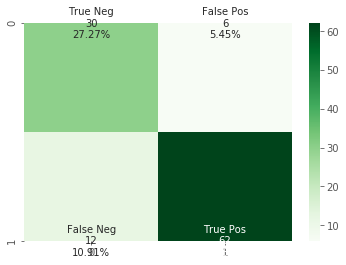

In [27]:
disp_confusion_matrix(prediction,y_test)

AUC: 0.81


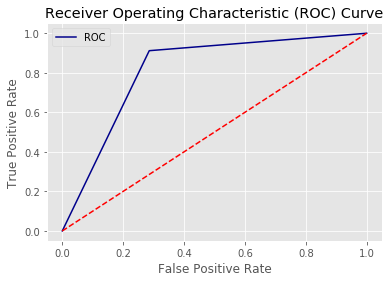

In [28]:
auc = roc_auc_score(y_test, prediction)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, prediction)
plot_roc_curve(fpr, tpr)

### 📌 With Hyper Parameters Tuning

### Minkowski

In [29]:
model = KNeighborsClassifier(n_jobs=-1)

#Hyper Parameters Set
params = {'n_neighbors':[3,5,7,9,11,13,15,17,19],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1],
          'metric':['minkowski'],
          'p':range(3,6)
         }


model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
model1.fit(X_train,y_train)

print("\033[1m * Parameters of KNN: \033[0m",model.get_params().keys())
print("\n \033[1m * Best Hyper Parameters: \033[0m",model1.best_params_)

 * Parameters of KNN:  dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

  * Best Hyper Parameters:  {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 3, 'p': 4, 'weights': 'distance'}


In [30]:
# Train Dataset
predicted = model1.predict(X_train)
actual = y_train
print("\n \033[1m * Train Accuracy:\033[0m",round(metrics.accuracy_score(actual,predicted),3))


  * Train Accuracy: 1.0


In [31]:
# Test Dataset
predicted = model1.predict(X_test)
actual = y_test
print("\n \033[1m * Test Accuracy:\033[0m",round(metrics.accuracy_score(actual,predicted),3))


  * Test Accuracy: 0.791



		  Classification Report:

               precision    recall  f1-score   support

           0       0.74      0.69      0.72        42
           1       0.82      0.85      0.83        68

    accuracy                           0.79       110
   macro avg       0.78      0.77      0.78       110
weighted avg       0.79      0.79      0.79       110


		  Confusion Matrix:


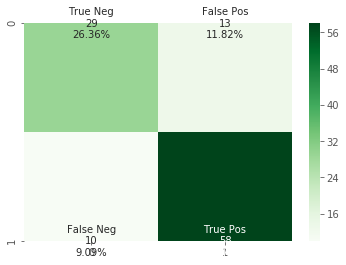

In [32]:
disp_confusion_matrix(actual,predicted)

AUC: 0.77


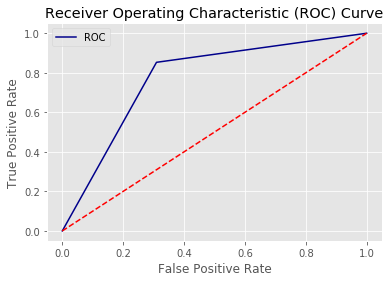

In [33]:
auc = roc_auc_score(actual, predicted)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(actual, predicted)
plot_roc_curve(fpr, tpr)

### Euclidean

In [34]:
#Hyper Parameters Set
params = {'n_neighbors':[3,5,7,9,11,13,15,17,19],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1],
          'metric':['euclidean'],
          'p':range(3,6)
         }


model2 = GridSearchCV(model, param_grid=params, n_jobs=1)
model2.fit(X_train,y_train)

print("\033[1m * Parameters of KNN: \033[0m",model.get_params().keys())
print("\n \033[1m * Best Hyper Parameters: \033[0m",model2.best_params_)

 * Parameters of KNN:  dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

  * Best Hyper Parameters:  {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 5, 'p': 3, 'weights': 'distance'}


In [35]:
# Train Dataset
predicted = model2.predict(X_train)
actual = y_train
print("\n \033[1m * Train Accuracy:\033[0m",round(metrics.accuracy_score(actual,predicted),3))


  * Train Accuracy: 1.0


In [36]:
# Test Dataset
predicted = model2.predict(X_test)
actual = y_test
print("\n \033[1m * Test Accuracy:\033[0m",round(metrics.accuracy_score(actual,predicted),3))


  * Test Accuracy: 0.845



		  Classification Report:

               precision    recall  f1-score   support

           0       0.82      0.76      0.79        42
           1       0.86      0.90      0.88        68

    accuracy                           0.85       110
   macro avg       0.84      0.83      0.83       110
weighted avg       0.84      0.85      0.84       110


		  Confusion Matrix:


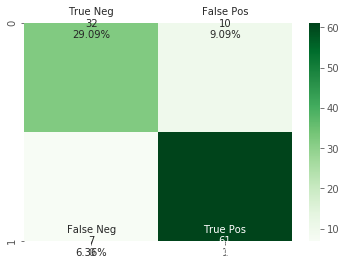

In [37]:
disp_confusion_matrix(actual,predicted)

AUC: 0.83


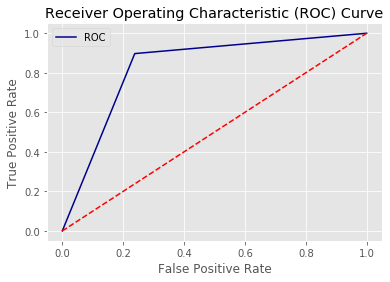

In [38]:
auc = roc_auc_score(actual, predicted)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(actual, predicted)
plot_roc_curve(fpr, tpr)

### Manhattan

In [39]:
#Hyper Parameters Set
params = {'n_neighbors':[3,5,7,9,11,13,15,17,19],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1],
          'metric':['manhattan'],
          'p':range(3,6)
         }

model3 = GridSearchCV(model, param_grid=params, n_jobs=1)
model3.fit(X_train,y_train)

print("\033[1m * Parameters of KNN: \033[0m",model.get_params().keys())
print("\n \033[1m * Best Hyper Parameters: \033[0m",model3.best_params_)

 * Parameters of KNN:  dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

  * Best Hyper Parameters:  {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'manhattan', 'n_jobs': -1, 'n_neighbors': 3, 'p': 3, 'weights': 'distance'}


In [40]:
# Train Dataset
predicted = model3.predict(X_train)
actual = y_train
print("\n \033[1m * Train Accuracy:\033[0m",round(metrics.accuracy_score(actual,predicted),3))


  * Train Accuracy: 1.0


In [41]:
# Test Dataset
predicted = model3.predict(X_test)
actual = y_test
print("\n \033[1m * Test Accuracy:\033[0m",round(metrics.accuracy_score(actual,predicted),3))


  * Test Accuracy: 0.836



		  Classification Report:

               precision    recall  f1-score   support

           0       0.77      0.81      0.79        42
           1       0.88      0.85      0.87        68

    accuracy                           0.84       110
   macro avg       0.83      0.83      0.83       110
weighted avg       0.84      0.84      0.84       110


		  Confusion Matrix:


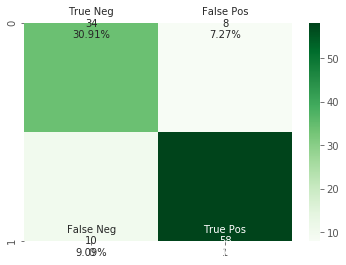

In [42]:
disp_confusion_matrix(actual,predicted)

AUC: 0.83


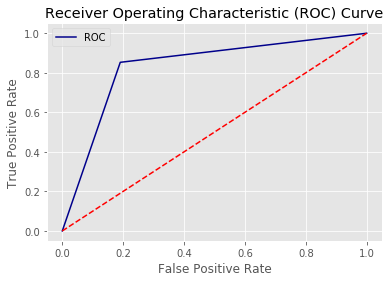

In [43]:
auc = roc_auc_score(actual, predicted)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(actual, predicted)
plot_roc_curve(fpr, tpr)